In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os

from semi_supervised_manifold_learning import *
from submodular_cut_fns import *

# plt.rcParams["animation.html"] = "jshtml"
# plt.ioff()
from IPython.display import HTML
from IPython.display import Audio


%load_ext autoreload
%autoreload 2

In [14]:
n = 17
m = 9
hypergraph = [
    (0,1),
    (2,3,4),
    (4,5),
    (5,6,7,8,9,10,11),
    (11,12,13),
    (10,14),
    (14,15,16),
    (9,16)
]
labels = np.hstack([
            np.full(shape=8, fill_value=-1),
            0,
            np.full(shape=8, fill_value=1),
        ])
label_names = dict({-1: "c1", 0: "mid",1: "c2"})
    
degree = unweighted_degree(n, hypergraph)
node_dict = dict(zip(np.arange(n), np.arange(n)))
mini_hypgergraph = dict({
        "n": n,
        "m": m,
        "degree": unweighted_degree(n, hypergraph),
        "hypergraph": hypergraph,
        "node_dict": node_dict,
        "labels": labels,
        "label_names": label_names,
    })

seeded = np.zeros(shape=n)
for c1_seeds in [0, 4]:
    seeded[c1_seeds] = -1
for c2_seeds in [13,-1]:    
    seeded[c2_seeds] = 1

In [32]:
def SSL(hypergraph_dict, seeded_labels, teleportation_factor = 0.1, step_size = 1, num_iterations = 100,
       error_tolerance=0.1, verbose = False):
    # teleportation_factor corresponds to a resolvent for lambda = effective_lambda
    effective_lambda = 2 * teleportation_factor / (1 - teleportation_factor)

    # let's extract some parameters
    n = hypergraph_dict["n"]
    m = hypergraph_dict["m"]
    hypergraph = hypergraph_dict["hypergraph"]

    degree_dict = hypergraph_dict["degree"]
    D = np.array([degree_dict[v] for v in range(n)])
    
    # PPR Partitioning
    if False:
        # Algorithm 1 specifies initialization at 0
        x0 = np.full(shape=(n, 1), fill_value=0)
        _, x, y, fx = diffusion(
            x0,
            n,
            m,
            D,
            hypergraph,
            weights=None,
            func=diffusion_functions["infinity"],
            s=np.reshape(seeded_labels, newshape = (n,1)),
            h=step_size,
            T=num_iterations,
            verbose=verbose,
        )
        x_out = (1 - error_tolerance / 2) * np.sum(x, axis=0).flatten()
    # Diffusion partitioning
    if True:
        x0 = np.reshape(seeded_labels, newshape = (n,1))
        s_vector = np.zeros_like(x0)
        # for our hypergraph, first specify the edge objective function
        t, x, y, fx = diffusion(
            x0,
            n,
            m,
            D,
            hypergraph,
            weights=None,
            func=diffusion_functions["infinity"],
            s=s_vector,
            h=step_size,
            T=num_iterations,
            verbose=verbose,
        )
        x_out = x[-1,:]
        
    print(x_out)
    return x_out

x_out = SSL(mini_hypgergraph, seeded)

[[-0.5       ]
 [-0.5       ]
 [ 0.04002316]
 [ 0.04002316]
 [ 0.04151214]
 [ 0.04412848]
 [ 0.04431802]
 [ 0.04431802]
 [ 0.04431802]
 [ 0.04663109]
 [ 0.04701455]
 [ 0.04731412]
 [ 0.04733478]
 [ 0.04736883]
 [ 0.0476559 ]
 [ 0.04808497]
 [ 0.04784924]]


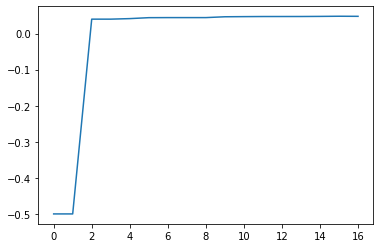

In [33]:
plt.plot(list(range(n)), x_out)
plt.show()